In [2]:
from mpl_toolkits import mplot3d
from neo.core import SpikeTrain
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import pair_confusion_matrix,contingency_matrix
from sklearn.metrics.cluster import rand_score
from statannot import add_stat_annotation
from tqdm import tqdm
import elephant as eph
import imageio
import matplotlib as mpl
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import os
import pandas as pd
import quantities as q
import re 
import seaborn as sns
import sys
mpl.rcParams.update({'font.size': 20})
%config Completer.use_jedi = False

In [13]:
def eval_dynamics(graphno):
    mat = np.loadtxt(f'../modules/networks/matrix_{graphno}.csv',delimiter=",")
    module = np.loadtxt(f'../modules/networks/matrix_{graphno}_modules.csv')
    order = np.argsort(module)

    all_events = []
    for pertseed in [59428,13674,84932,72957,85036]:
        events = np.load(f"../fig2/Data/LN30_events_{graphno}_{pertseed}.npy",allow_pickle=True)
        all_events.append(events)
    all_events = np.array(all_events,dtype=object)

    dist = []
    axs = []
    for rep in tqdm(range(5)):
        spike_times = []
        for i in range(30):
            spike_times.append(SpikeTrain(np.concatenate([all_events[0,rep,i],
                                               all_events[1,rep,i]+7000,
                                               all_events[2,rep,i]+14000,
                                               all_events[3,rep,i]+21000,
                                               all_events[4,rep,i]+28000
                                                         ])*q.ms,t_stop=35000*q.ms))
        spike_times = np.array(spike_times)
        bst = eph.conversion.BinnedSpikeTrain(list(spike_times),bin_size=50*q.ms)
        axes = []
        for i in np.unique(module):
            temp = np.mean(bst.to_array()[np.arange(30)[module==i],:],axis=0)
            axes.append(temp)
        axs.append(axes)
        pearson_correlation = eph.spike_train_correlation.correlation_coefficient(bst)
        dist.append(pearson_correlation)
    axs = np.array(axs)
    distance_matrix = np.array(dist)
    pearson_correlation = np.mean(distance_matrix,axis=0)
    
    return mat,module,order,np.nan_to_num(pearson_correlation),axs

  0%|                                                                                            | 0/5 [00:00<?, ?it/s]<ipython-input-47-0e7664637f16>:23: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  spike_times = np.array(spike_times)
100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 34.07it/s]


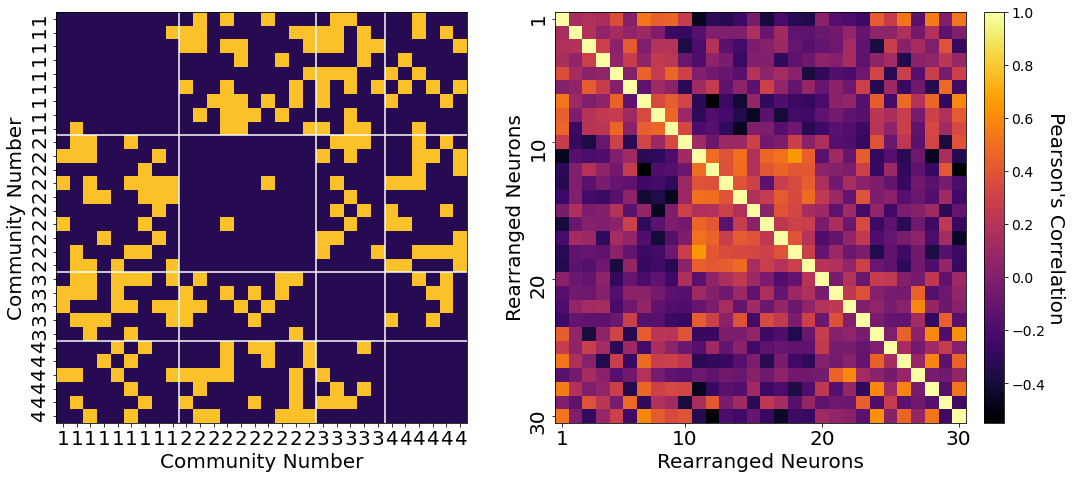

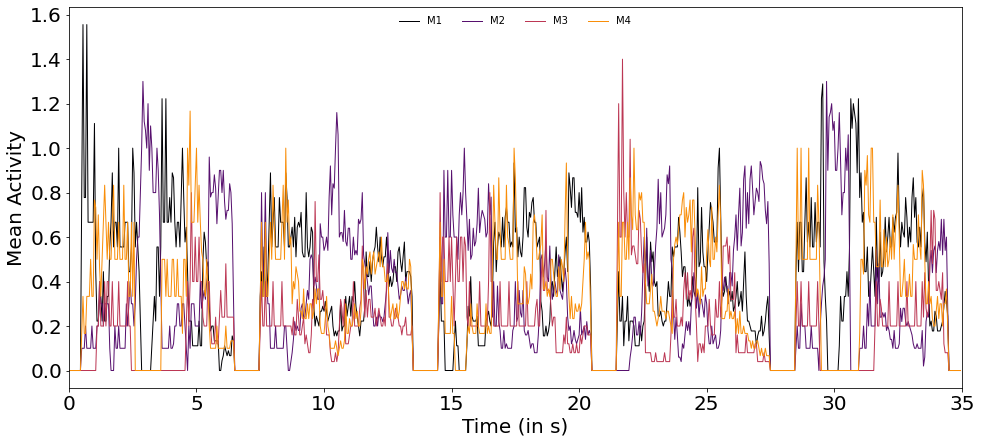

  0%|                                                                                            | 0/5 [00:00<?, ?it/s]<ipython-input-47-0e7664637f16>:23: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  spike_times = np.array(spike_times)
100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 26.02it/s]


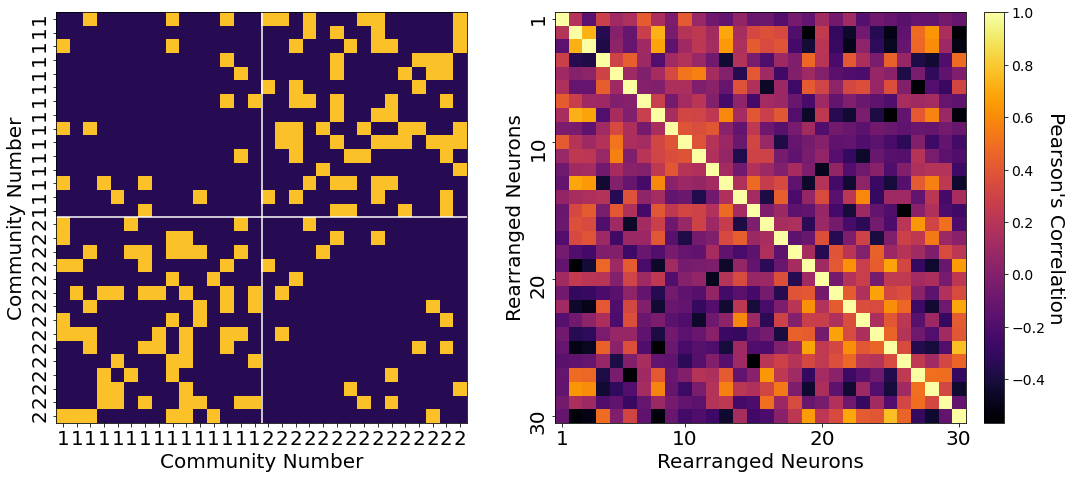

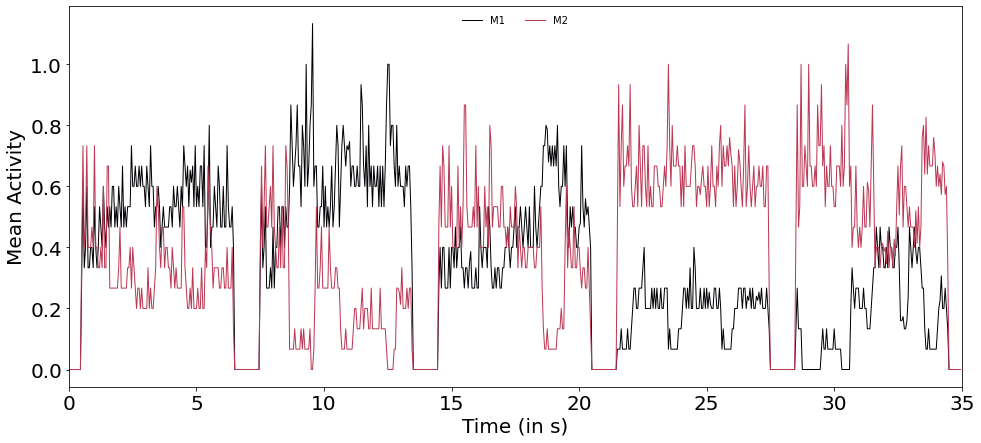

  0%|                                                                                            | 0/5 [00:00<?, ?it/s]<ipython-input-47-0e7664637f16>:23: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  spike_times = np.array(spike_times)
D:\Anaconda3\envs\odor-states\lib\site-packages\numpy\lib\function_base.py:2642: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
D:\Anaconda3\envs\odor-states\lib\site-packages\numpy\lib\function_base.py:2643: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 22.04it/s]


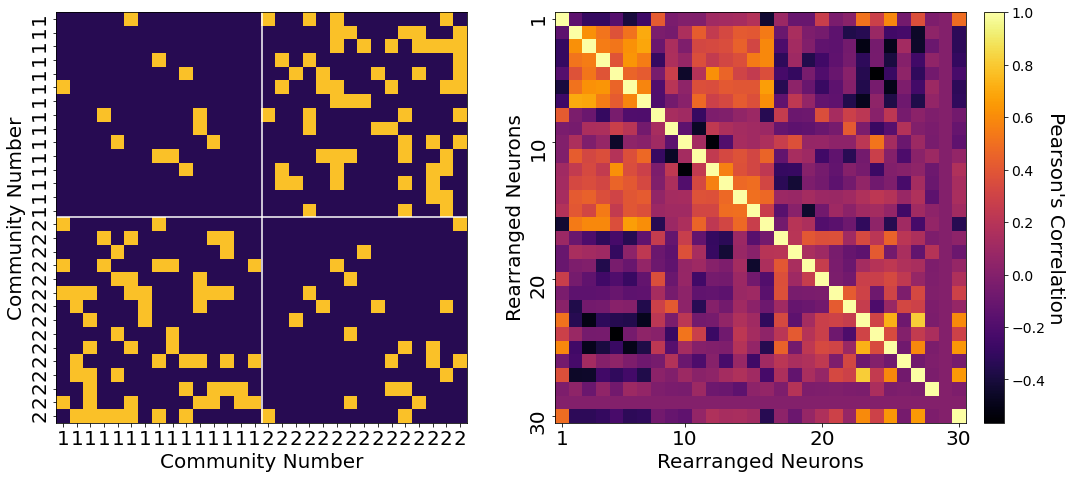

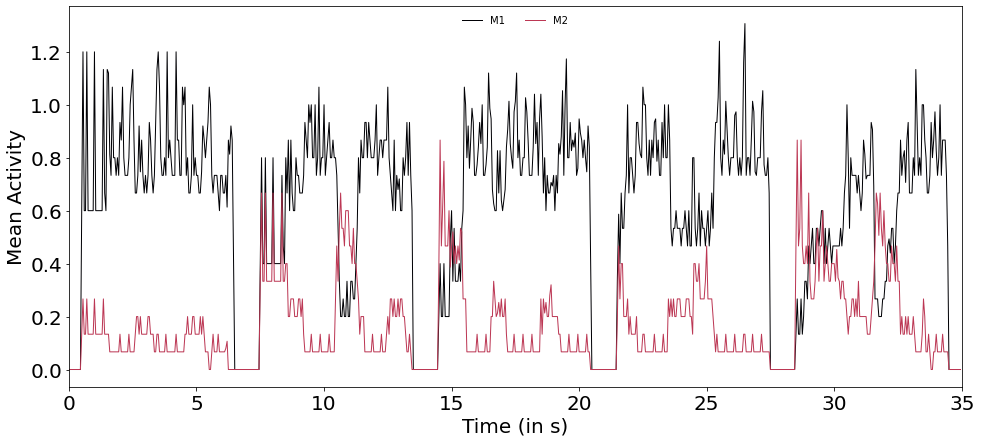

  0%|                                                                                            | 0/5 [00:00<?, ?it/s]<ipython-input-47-0e7664637f16>:23: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  spike_times = np.array(spike_times)
100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 29.40it/s]


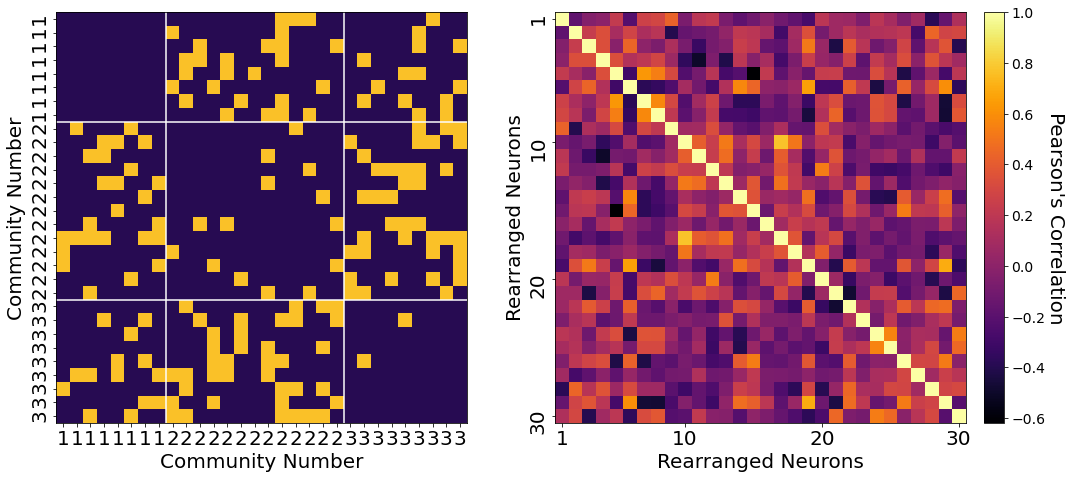

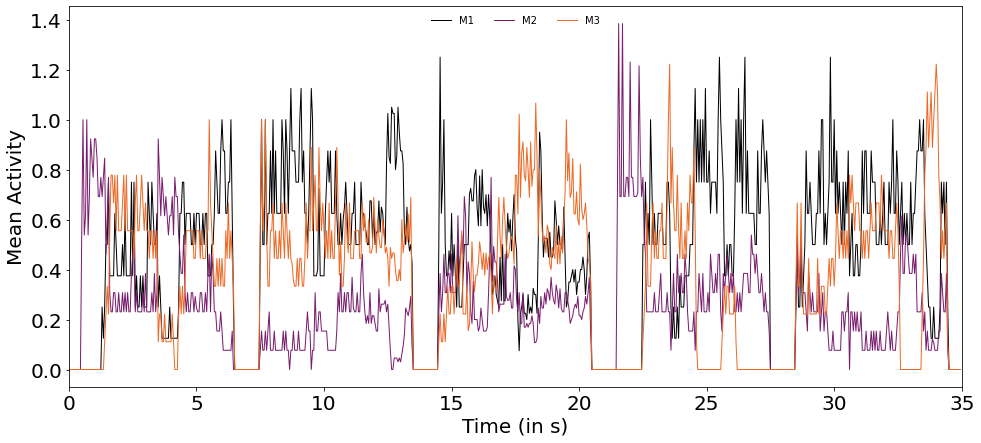

  0%|                                                                                            | 0/5 [00:00<?, ?it/s]<ipython-input-47-0e7664637f16>:23: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  spike_times = np.array(spike_times)
100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 23.54it/s]


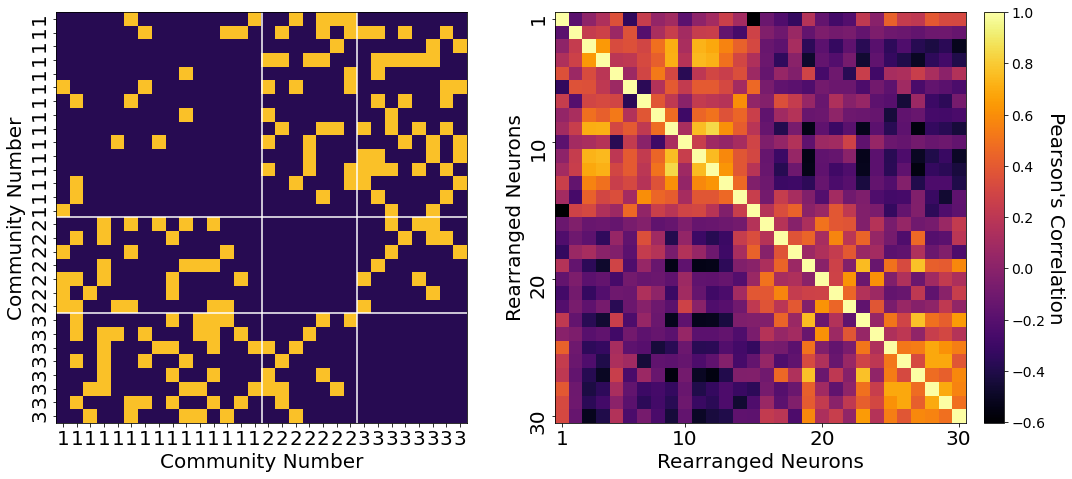

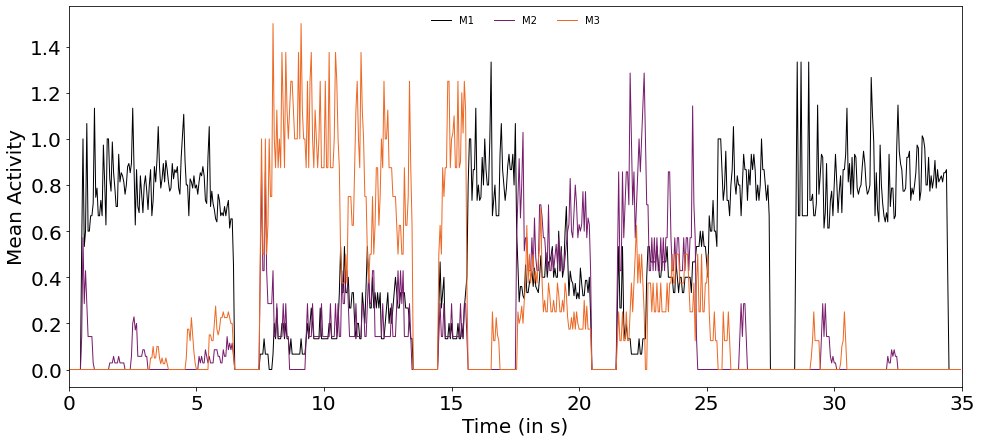

  0%|                                                                                            | 0/5 [00:00<?, ?it/s]<ipython-input-47-0e7664637f16>:23: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  spike_times = np.array(spike_times)
100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 21.37it/s]


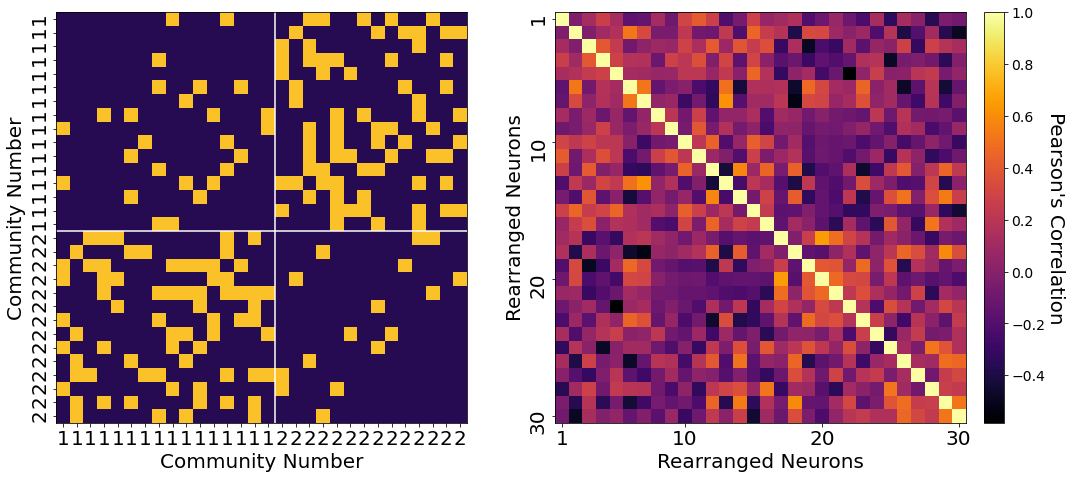

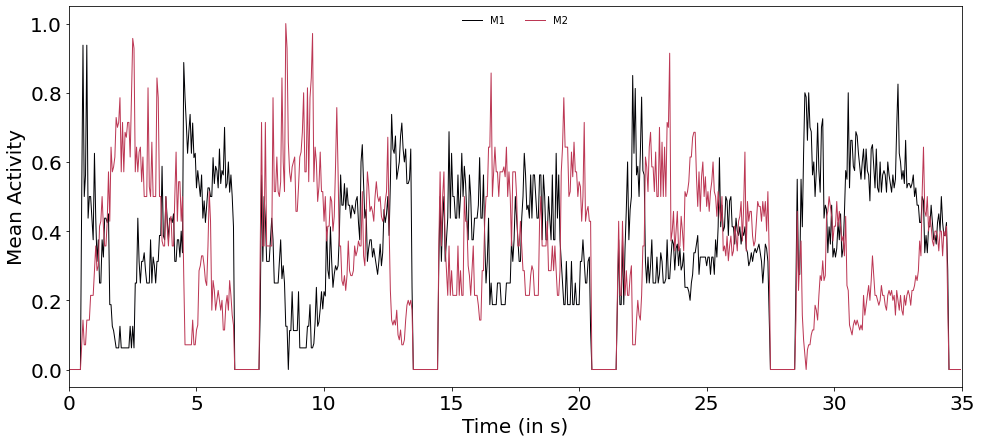

  0%|                                                                                            | 0/5 [00:00<?, ?it/s]<ipython-input-47-0e7664637f16>:23: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  spike_times = np.array(spike_times)
D:\Anaconda3\envs\odor-states\lib\site-packages\numpy\lib\function_base.py:2642: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
D:\Anaconda3\envs\odor-states\lib\site-packages\numpy\lib\function_base.py:2643: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 30.76it/s]


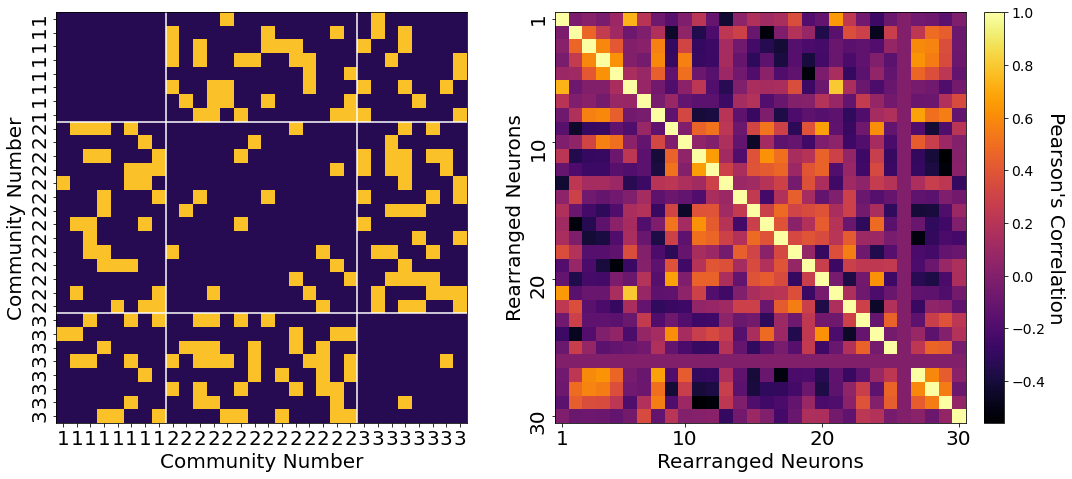

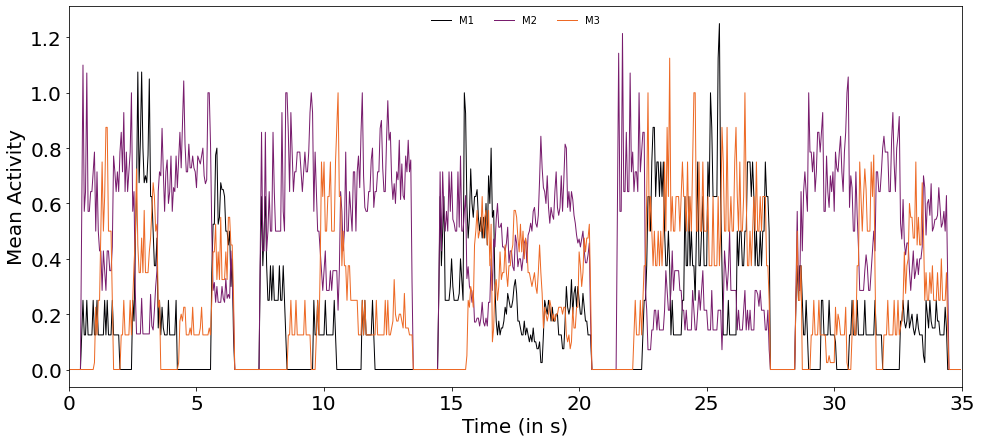

  0%|                                                                                            | 0/5 [00:00<?, ?it/s]<ipython-input-47-0e7664637f16>:23: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  spike_times = np.array(spike_times)
100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 34.22it/s]


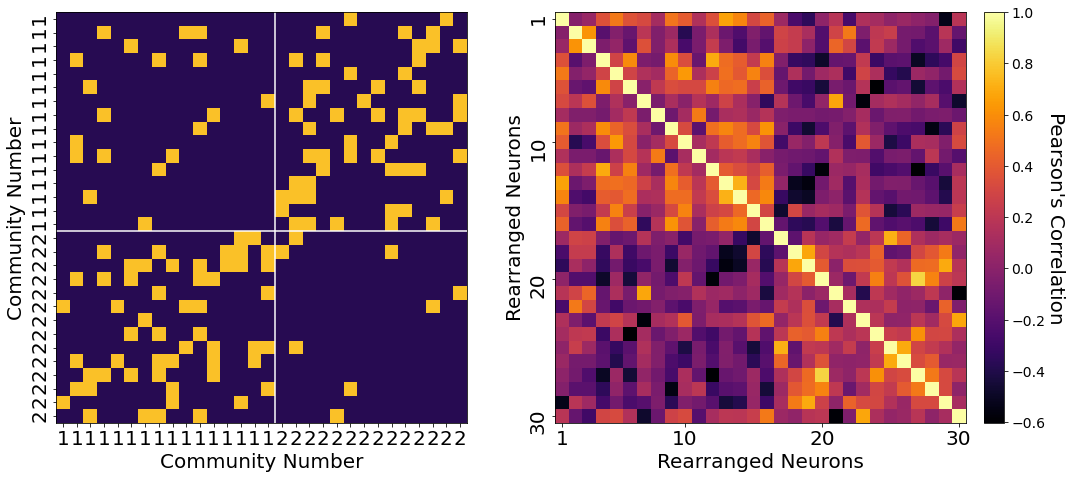

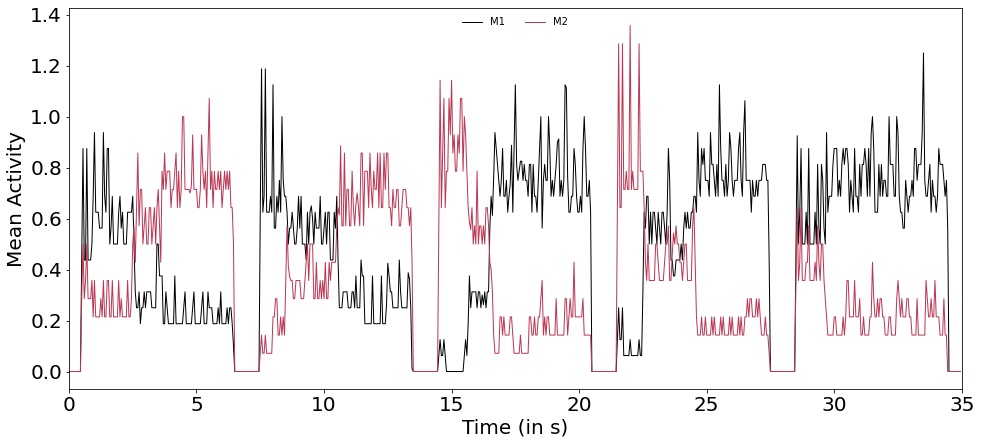

  0%|                                                                                            | 0/5 [00:00<?, ?it/s]<ipython-input-47-0e7664637f16>:23: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  spike_times = np.array(spike_times)
D:\Anaconda3\envs\odor-states\lib\site-packages\numpy\lib\function_base.py:2642: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
D:\Anaconda3\envs\odor-states\lib\site-packages\numpy\lib\function_base.py:2643: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 40.12it/s]


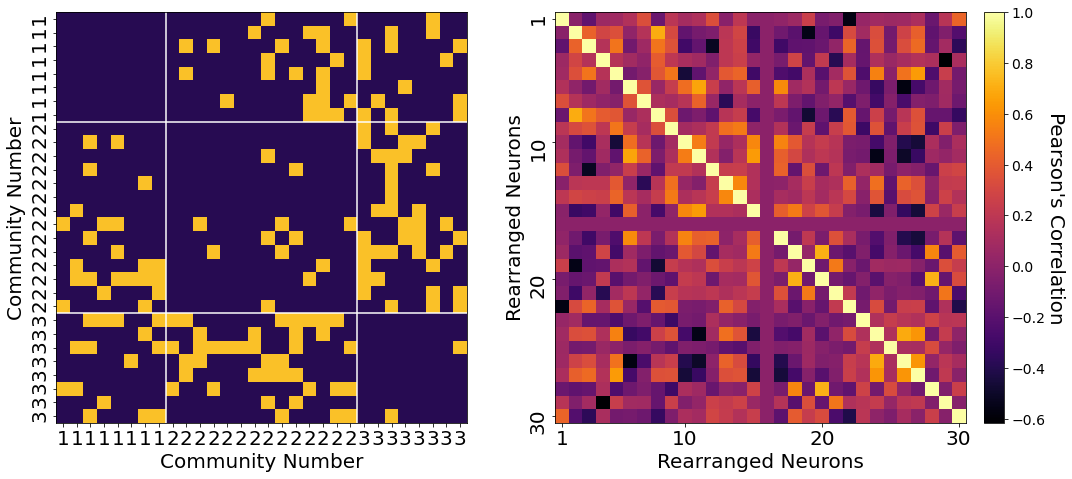

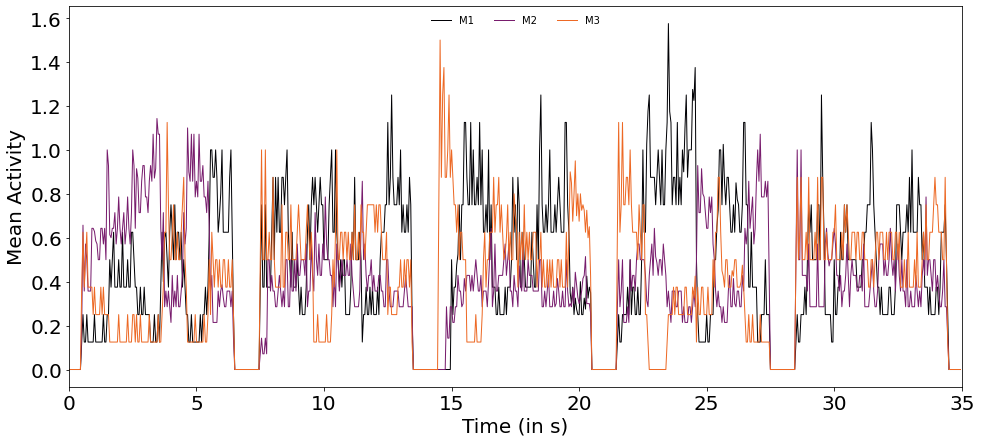

  0%|                                                                                            | 0/5 [00:00<?, ?it/s]<ipython-input-47-0e7664637f16>:23: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  spike_times = np.array(spike_times)
100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 38.26it/s]


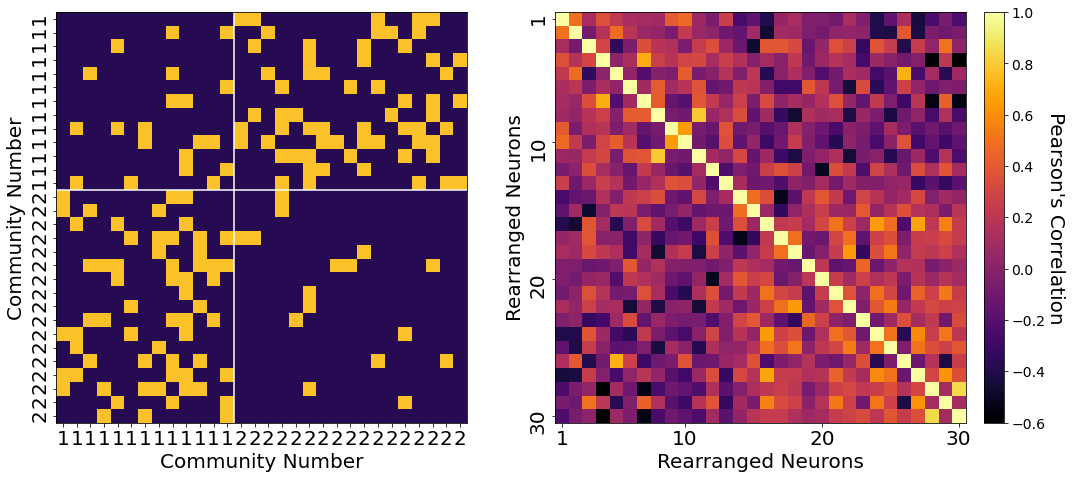

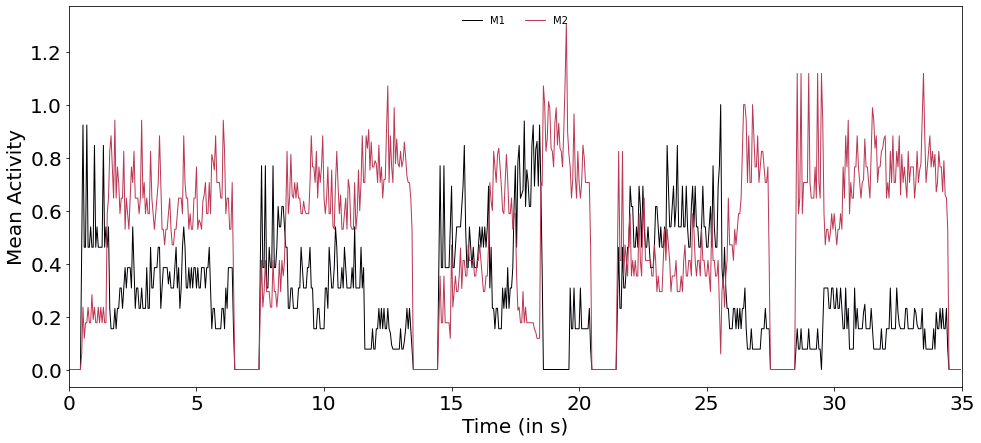

In [60]:
for graphno in range(1,11):
    mat,module,order,sync,axs = eval_dynamics(graphno)
    fig = plt.figure(figsize=(15.5,7))
    fig.add_subplot(1,2,1)
    plt.imshow(mat[order,:][:,order],aspect='equal',cmap=plt.cm.inferno)
    plt.clim((-0.2,1.2))
    for i in np.arange(29)[np.diff(np.sort(module))==1]:
        plt.hlines(i+0.5,-0.5,29.5,color='white')
        plt.vlines(i+0.5,-0.5,29.5,color='white')
    plt.xticks(np.arange(30),[f"{x:.0f}" for x in np.sort(module)])
    plt.xlabel('Community Number')
    plt.yticks(np.arange(30),[f"{x:.0f}"for x in np.sort(module)],rotation=90)
    plt.ylabel('Community Number')
    fig.add_subplot(1,2,2)
    plt.imshow(sync[order,:][:,order],aspect='equal',cmap=plt.cm.inferno)
    plt.xticks([0,9,19,29],[1,10,20,30])
    plt.xlabel('Rearranged Neurons')
    plt.yticks([0,9,19,29],[1,10,20,30],rotation=90)
    plt.ylabel('Rearranged Neurons')
    cbar = plt.colorbar(fraction=0.046, pad=0.04)
    cbar.ax.tick_params(labelsize=14) 
#     cbar.ax.set_yticks([-1,0,1],["-1","0","1"])
    cbar.set_label("Pearson's Correlation", rotation=270,labelpad=20)
    plt.savefig(f"Figures/Structure_Dynamics_{graphno}.svg")
    plt.tight_layout()
    plt.show()
    fig = plt.figure(figsize=(16,7))
    ax = fig.add_subplot(1,1,1)
    for i in range(axs.shape[1]):
        ax.plot(np.arange(axs.shape[2])/20,axs.mean(axis=0)[i],"-",color=plt.cm.inferno(i/axs.shape[1]),linewidth=1,label=f'M{i+1}')
    plt.legend(loc='upper center', ncol=axs.shape[1], fontsize=10, frameon=False)
    ax.set_xlim((0,35))
    ax.set_xlabel("Time (in s)")
    ax.set_ylabel("Mean Activity")
    plt.savefig(f"Figures/Dynamics_{graphno}.svg")
    plt.show()

# Correlation Analysis

In [25]:
results = []
for i in range(1,11):
    mat,module,order,sync = eval_dynamics(i)
    correlation = np.corrcoef(np.nan_to_num(sync).flatten(),1-mat.flatten())[0,1]
    random_shuffles = [np.random.choice(np.arange(30),size=30,replace=False) for x in range(1000)]
    shuffled = np.mean([np.corrcoef(np.nan_to_num(sync).flatten(),1-mat[:,order][order,:].flatten())[0,1] for order in random_shuffles])
    results.append((correlation,shuffled))
results=np.array(results)
results = pd.DataFrame(results,columns=["Original","Shuffled"])

  0%|                                                                                                                                                           | 0/5 [00:00<?, ?it/s]<ipython-input-23-42aa449bc6f4>:22: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  spike_times = np.array(spike_times)
100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:23<00:00,  4.76s/it]


In [26]:
results=np.array(results)
results = pd.DataFrame(results,columns=["Original","Shuffled"])

In [27]:
if not os.path.exists("Data/CorrelationAnalysis.csv"):
    results.to_csv("Data/CorrelationAnalysis.csv")
else:
    results = pd.read_csv("Data/CorrelationAnalysis.csv",index_col=0)

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Original v.s. Shuffled: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.827e-04 U_stat=1.000e+02


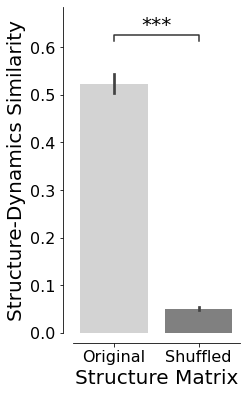

In [28]:
plt.figure(figsize=(3,6))
mpl.rc('xtick', labelsize=16) 
mpl.rc('ytick', labelsize=16) 
ax = sns.barplot(data=results,palette='blend:lightgrey,grey')
# ax = sns.stripplot(data=results,palette='blend:grey,black',size=3)
sns.despine(offset=10, trim=False)
ax.set_xlabel("Structure Matrix")
ax.set_ylabel("Structure-Dynamics Similarity")
ax, test_results = add_stat_annotation(ax, data=results,
                                   box_pairs=[("Original", "Shuffled")],
                                   test='Mann-Whitney', text_format='star', loc='inside', verbose=2)
plt.savefig(f"Figures/CorrelationAnalysis.svg")

# Reconstruction Analysis

In [68]:
results = []
for i in range(1,11):
    mat,module,order,sync = eval_dynamics(i)
    cluster_model = KMeans(n_clusters=int(np.max(module)))
    cluster_model.fit((1-sync)/2)
    f_correctpairs = rand_score(cluster_model.labels_,np.int32(module-1))
    random_clustering = [np.random.choice(np.arange(4),size=30) for x in range(1000)]
    shuffled = np.mean([rand_score(cluster_model.labels_,cluster) for cluster in random_clustering])
    results.append((f_correctpairs,shuffled))
results = np.array(results)
results = pd.DataFrame(results,columns=["Newman","Random"])

  0%|                                                                                            | 0/5 [00:00<?, ?it/s]<ipython-input-2-42aa449bc6f4>:22: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  spike_times = np.array(spike_times)
  0%|                                                                                            | 0/5 [00:00<?, ?it/s]<ipython-input-2-42aa449bc6f4>:22: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  spike_times = np.array(spike_times)
  0%|                                                                               

In [69]:
if not os.path.exists("Data/ReconstructionAnalysis.csv"):
    results.to_csv("Data/ReconstructionAnalysis.csv")
else:
    results = pd.read_csv("Data/ReconstructionAnalysis.csv",index_col=0)

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Newman v.s. Random: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.127e-02 U_stat=8.400e+01


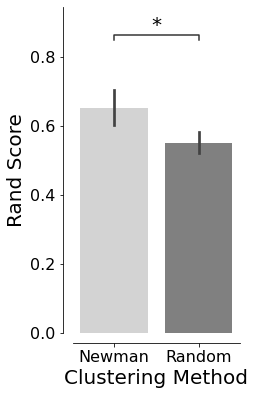

In [78]:
plt.figure(figsize=(3,6))
mpl.rc('xtick', labelsize=16) 
mpl.rc('ytick', labelsize=16) 
ax = sns.barplot(data=results,palette='blend:lightgrey,grey')
# ax = sns.stripplot(data=results,palette='blend:grey,black',size=3)
sns.despine(offset=10, trim=False)
ax.set_xlabel("Clustering Method")
ax.set_ylabel("Rand Score")
ax, test_results = add_stat_annotation(ax, data=results,
                                   box_pairs=[("Newman","Random")],
                                   test='Mann-Whitney', text_format='star', loc='inside', verbose=2)
plt.savefig(f"Figures/ReconstructionAnalysis.svg")

In [71]:
graphno = 2
mat = np.loadtxt(f'../modules/networks/matrix_{graphno}.csv',delimiter=",")
module = np.loadtxt(f'../modules/networks/matrix_{graphno}_modules.csv')
order = np.argsort(module)

all_events = []
for pertseed in [59428,13674,84932,72957,85036]:
    events = np.load(f"../Fig 2/Data/LN30_events_{graphno}_{pertseed}.npy",allow_pickle=True)
    all_events.append(events)
all_events = np.array(all_events,dtype=object)

dist = []
for rep in tqdm(range(5)):
    spike_times = []
    for i in range(30):
        spike_times.append(SpikeTrain(np.concatenate([all_events[0,rep,i],
                                           all_events[1,rep,i]+7000,
                                           all_events[2,rep,i]+14000,
                                           all_events[3,rep,i]+21000,
                                           all_events[4,rep,i]+28000])*q.ms,t_stop=35000*q.ms))
    spike_times = np.array(spike_times)
    bst = eph.conversion.BinnedSpikeTrain(list(spike_times),bin_size=50*q.ms)
    sync = eph.spike_train_correlation.correlation_coefficient(bst)
    dist.append(sync)
distance_matrix = np.array(dist)
sync = np.mean(distance_matrix,axis=0)

  0%|                                                                                            | 0/5 [00:00<?, ?it/s]<ipython-input-71-ca98efe603eb>:21: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  spike_times = np.array(spike_times)
100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:23<00:00,  4.71s/it]


In [80]:
cluster_model = KMeans(n_clusters=int(np.max(module)))
cluster_model.fit((1-sync)/2)
order2 = np.argsort(cluster_model.labels_)

KMeans(n_clusters=2)

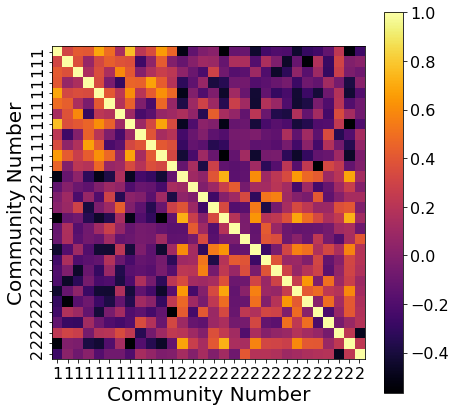

In [112]:
fig = plt.figure(figsize=(7,7))
mpl.rc('xtick', labelsize=16) 
mpl.rc('ytick', labelsize=16) 
plt.imshow(sync[order2,:][:,order2],aspect='equal',cmap=plt.cm.inferno)
plt.xticks(np.arange(30),[f"{x:.0f}" for x in np.sort(cluster_model.labels_+1)])
plt.xlabel('Community Number')
plt.yticks(np.arange(30),[f"{x:.0f}" for x in np.sort(cluster_model.labels_+1)],rotation=90)
plt.ylabel('Community Number')
plt.colorbar()
plt.savefig(f"Figures/ReconstructionCluster{graphno}.svg")

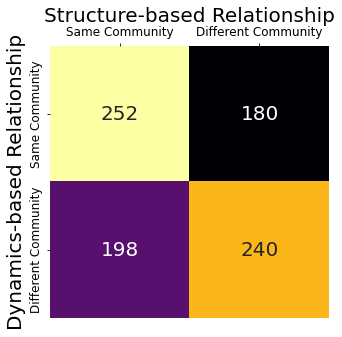

In [122]:
plt.figure(figsize=(5,5))
mpl.rc('xtick', labelsize=12) 
mpl.rc('ytick', labelsize=12) 
ax = sns.heatmap(pair_confusion_matrix(cluster_model.labels_,np.int32(module-1)),annot=True,fmt="d",cbar=False,cmap=plt.cm.inferno)
plt.xticks([0.5,1.5],["Same Community","Different Community"])
plt.yticks([0.5,1.5],["Same Community","Different Community"],va='center')
ax.xaxis.tick_top()
ax.xaxis.set_label_position('top') 
plt.xlabel("Structure-based Relationship")
plt.ylabel("Dynamics-based Relationship")
plt.savefig(f"Figures/ReconstructionComparision.svg")

In [4]:
graphno = 2
mat = np.loadtxt(f'../modules/networks/matrix_{graphno}.csv',delimiter=",")
module = np.loadtxt(f'../modules/networks/matrix_{graphno}_modules.csv')
order = np.argsort(module)
all_events = []
for pertseed in [59428,13674,84932,72957,85036]:
    events = np.load(f"../fig2/Data/LN30_events_{graphno}_{pertseed}.npy",allow_pickle=True)
    all_events.append(events)
all_events = np.array(all_events,dtype=object)
dx = []
dy = []
xax = []
yax = []
axs = []
for rep in range(5):
    spike_times = []
    for i in range(30):
        spike_times.append(SpikeTrain(np.concatenate([all_events[0,rep,i],
                                           all_events[1,rep,i]+7000,
                                           all_events[2,rep,i]+14000,
                                           all_events[3,rep,i]+21000,
                                           all_events[4,rep,i]+28000])*q.ms,t_stop=35000*q.ms))
    spike_times = np.array(spike_times)
    bst = eph.conversion.BinnedSpikeTrain(list(spike_times),bin_size=50*q.ms)
    axes = []
    daxes = []
    for i in np.unique(module):
        temp = np.mean(bst.to_array()[np.arange(30)[module==i],:],axis=0)
        axes.append(temp)
        daxes.append(np.diff(temp))
    time = np.arange(0,35,0.05)
    block = [False]*2+[True]*18
    temp =  [True]*20 + block*5
    temp = temp*5
    for i in range(len(axes)):
        axes[i] = axes[i][np.logical_and(time%7>=0.5,time%7<6.5)][temp]
        daxes[i] = daxes[i][np.logical_and(time%7>=0.5,time%7<6.5)[:-1]][temp]
    axs.append(axes)
    df = pd.DataFrame(data=np.array([np.around(i,decimals=1) for i in axes[:2]]+daxes[:2]).T,columns=["X","Y","dX","dY"])
    dX = df.pivot_table(index="X",columns="Y", values="dX")
    dY = df.pivot_table(index="X",columns="Y", values="dY")
    dx.append(dX.values)
    dy.append(dY.values)
    xax.append(dX.index.values)
    xax.append(dY.index.values)
    yax.append(dX.columns.values)
    yax.append(dY.columns.values)
xax = np.sort(np.unique(np.concatenate(xax)))
yax = np.sort(np.unique(np.concatenate(yax)))
X, Y = np.meshgrid(xax,yax)
axs = np.array(axs)

<ipython-input-4-3d09914a43c2>:23: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  spike_times = np.array(spike_times)
<ipython-input-4-3d09914a43c2>:23: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  spike_times = np.array(spike_times)
<ipython-input-4-3d09914a43c2>:23: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  spike_times = np.ar

D:\Anaconda3\envs\odor-states\lib\site-packages\seaborn\distributions.py:1182: UserWarning: linewidths is ignored by contourf
  cset = contour_func(
<ipython-input-5-87abece7d392>:7: RuntimeWarning: Mean of empty slice
  ax.quiver(X, Y, np.nanmean(dx,axis=0), np.nanmean(dy,axis=0), units='xy' ,scale=2, color='k')


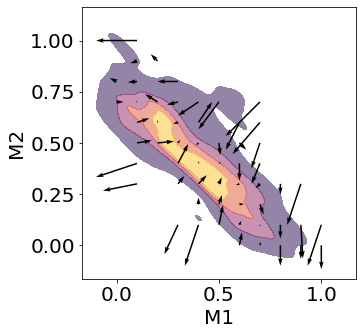

In [5]:
fig = plt.figure(figsize=(5,5))
ax= fig.add_subplot(111)
df = pd.DataFrame(np.array([axs[:,0,:].flatten(),axs[:,1,:].flatten()]).T,columns=["M1","M2"])
# sns.histplot(x="M1", y="M2",data=df, bins=10, pthresh=.05, cmap="inferno")
sns.kdeplot(x="M1", y="M2",data=df, levels=5, cmap='inferno', linewidths=1,fill=True,alpha=0.5)
# sns.scatterplot(x="M1", y="M2",data=df, s=5, color=".15")
ax.quiver(X, Y, np.nanmean(dx,axis=0), np.nanmean(dy,axis=0), units='xy' ,scale=2, color='k')
ax.set_aspect('equal')

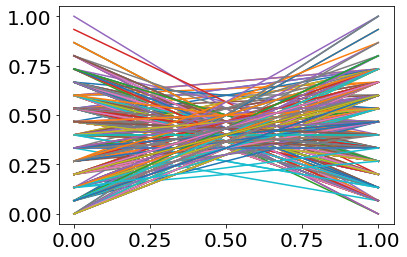

In [7]:
plt.plot(axs[0])

  0%|                                                                                            | 0/5 [00:00<?, ?it/s]<ipython-input-13-dd5e5a43702e>:23: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  spike_times = np.array(spike_times)
100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 18.67it/s]


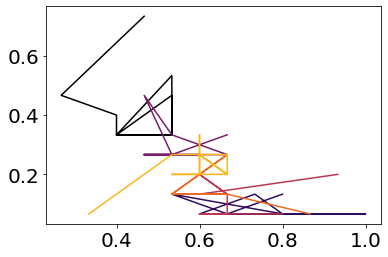

In [29]:
mat,module,order,sync,axs = eval_dynamics(2)
# plt.plot(axs[0][0][140:151],axs[0][1][140:151],color=plt.cm.inferno(0.0))
for i in range(6):
    plt.plot(axs[0][0][140+10+20*i+10:140+10+20*i+20],axs[0][1][140+10+20*i+10:140+10+20*i+20],color=plt.cm.inferno(i/6.0))